# Wine Quality Prediction (Red Wine)

## Project Overview
This project predicts the quality of red wine using supervised machine learning classification models (Decision Tree and Random Forest).  
The goal is to learn how tree-based models work on a real-world, multi-class classification dataset.

## Objective
- Build classification models (Decision Tree, Random Forest)  
- Compare model performance using accuracy and classification metrics  
- Interpret how different physicochemical features affect wine quality  

## Dataset Info
- **Source:** UCI Wine Quality – Red Wine dataset  
- **Samples:** 1,599 red wine observations  
- **Features:** 11 physicochemical attributes (acidity, sulphates, alcohol, etc.)  
- **Target:** `quality` (integer score representing wine quality)  

## Technologies Used
- Python, Pandas, NumPy  
- Scikit-learn (DecisionTreeClassifier, RandomForestClassifier, GridSearchCV)  
- Matplotlib  
- Jupyter Notebook  


# 1. Import Libraries
 Importing the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
Loading the Red Wine Quality dataset and inspecting the first few rows.

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Exploratory Data Analysis (EDA)
Analyzing the dataset structure, checking for missing values, and understanding feature distributions.

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

In [6]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


 **Correlation Analysis
Using a heatmap to visualize the correlation between different features.**

In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


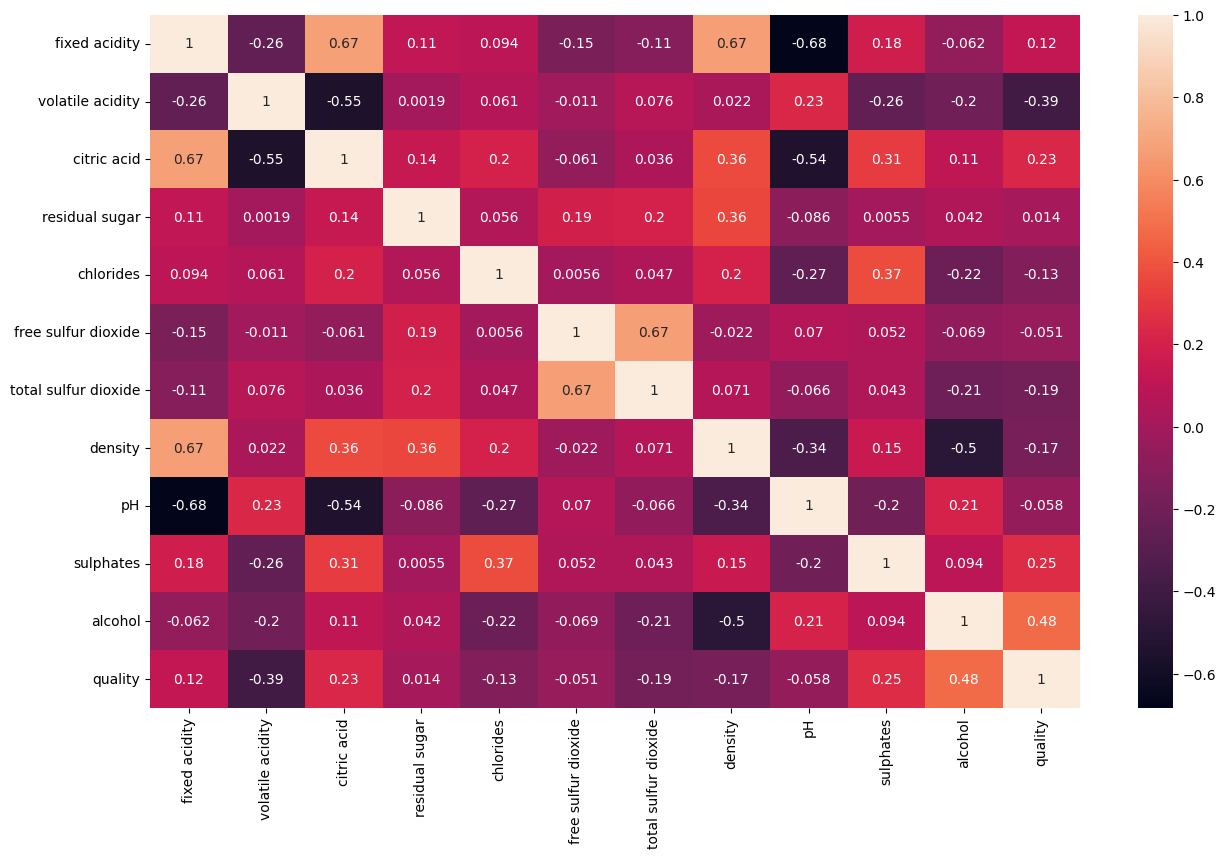

In [8]:
plt.figure(figsize=(15,9))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

**Feature Distribution
Visualizing the data distribution using histograms.**

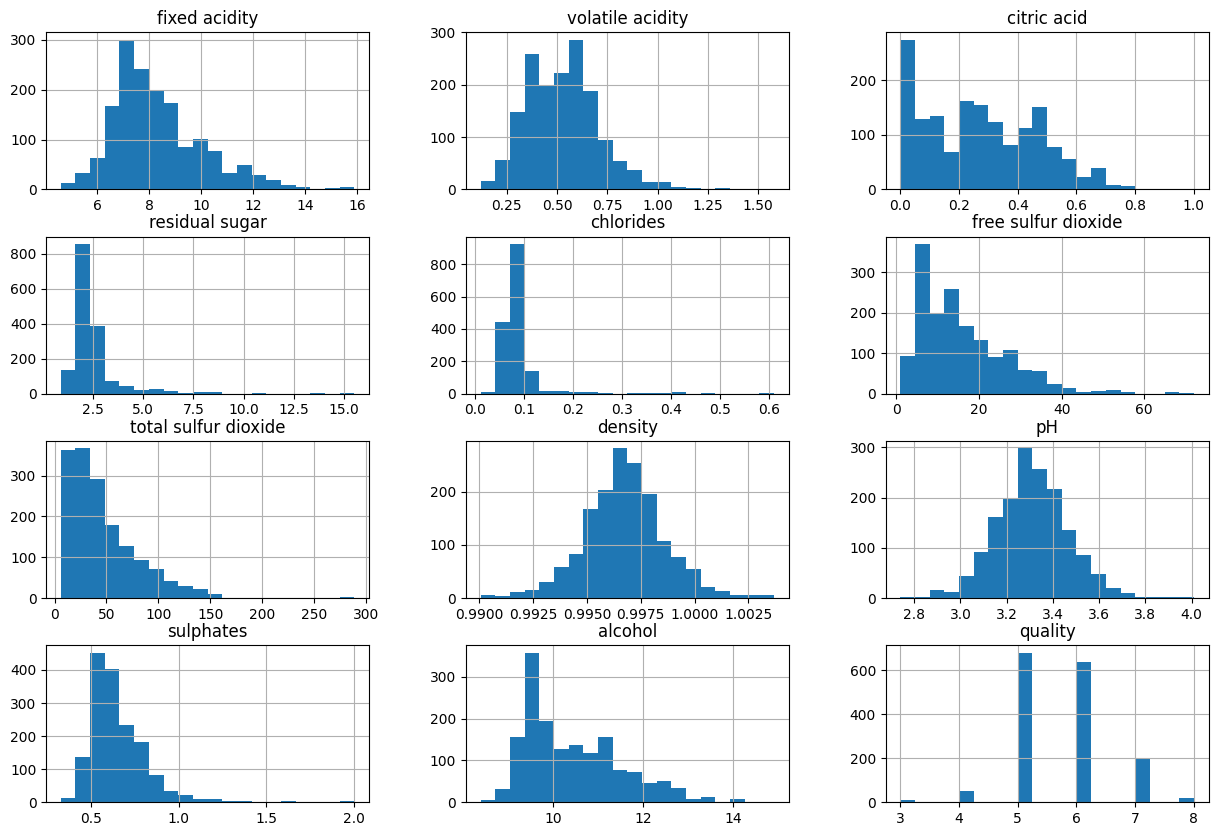

In [9]:
df.hist(figsize=(15, 10), bins=20)
plt.show()


# 4. Data Preprocessing

**Feature Separation:
Separating the independent features (x) and the dependent target variable (y).**

In [10]:
# Splitting data into x and y
x = df.drop(columns = 'quality')
y = df['quality']

**Outlier Detection
Using boxplots to visualize outliers in the dataset.**

<Axes: >

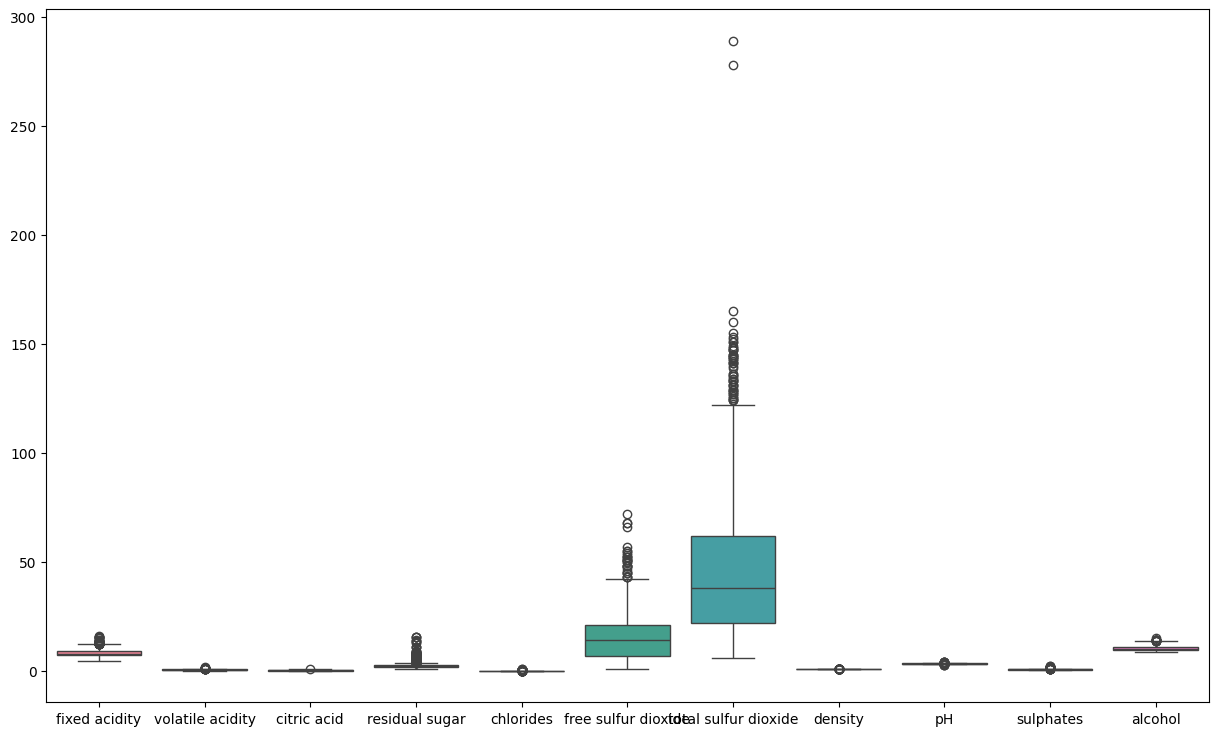

In [11]:
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = x, ax=ax)

**Outlier Removal (IQR Method):
Implementing the Interquartile Range (IQR) method to remove outliers from specific columns (residual sugar, free sulfur dioxide, total sulfur dioxide, chlorides) to improve model stability.**

In [12]:
cols = ['residual sugar','free sulfur dioxide', 'total sulfur dioxide', 'chlorides']

mask = np.ones(len(df), dtype=bool)

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  mask &= (x[col] >= lower) & (x[col] <= upper)

df_clean = df[mask]

# 5. Model Training: Decision Tree

In [13]:
# Updating x and y with cleaned data
x = df_clean.drop(columns='quality')
y = df_clean['quality']

<Axes: >

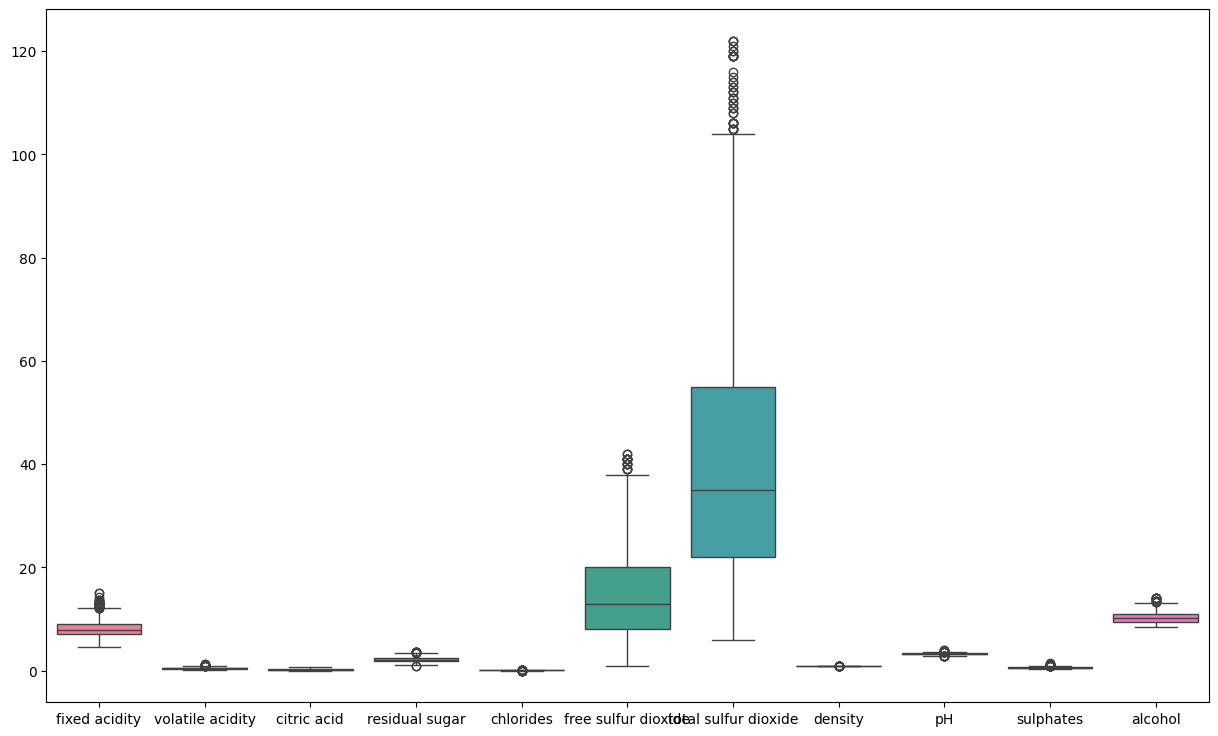

In [14]:
# Visualizing clean data
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = x, ax=ax)

**Splitting the cleaned data into training and testing sets (80% Train, 20% Test).**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

**Training the Decision Tree model.**

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

**Model Evaluation:
Evaluating the model using Accuracy Score, Classification Report, and Confusion Matrix.**

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([5, 5, 6, 5, 4, 5, 6, 6, 5, 6, 6, 4, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 7, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 7, 5, 5, 4,
       6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 4, 6, 5, 7, 6, 6, 5, 6, 5, 4, 5,
       7, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6,
       7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 7, 4,
       5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 7, 7, 5, 6, 6, 4, 6, 6, 5, 7, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 7, 5, 5, 7, 5, 5, 6, 4, 6, 6, 7, 7, 7, 7, 5, 7, 5,
       5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6])

**Visualizing the Tree**

[Text(0.4724024540960452, 0.9772727272727273, 'x[10] <= 10.15\ngini = 0.639\nsamples = 1037\nvalue = [3, 33, 429, 433, 126, 13]'),
 Text(0.19818149717514125, 0.9318181818181818, 'x[9] <= 0.555\ngini = 0.519\nsamples = 513\nvalue = [2, 19, 317, 160, 14, 1]'),
 Text(0.3352919756355932, 0.9545454545454546, 'True  '),
 Text(0.04254943502824859, 0.8863636363636364, 'x[4] <= 0.069\ngini = 0.376\nsamples = 192\nvalue = [0, 12, 148, 31, 1, 0]'),
 Text(0.015065913370998116, 0.8409090909090909, 'x[10] <= 9.25\ngini = 0.566\nsamples = 25\nvalue = [0, 1, 13, 10, 1, 0]'),
 Text(0.011299435028248588, 0.7954545454545454, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.018832391713747645, 0.7954545454545454, 'x[10] <= 9.75\ngini = 0.531\nsamples = 21\nvalue = [0, 1, 13, 6, 1, 0]'),
 Text(0.007532956685499058, 0.75, 'x[1] <= 0.245\ngini = 0.292\nsamples = 12\nvalue = [0, 1, 10, 1, 0, 0]'),
 Text(0.003766478342749529, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 

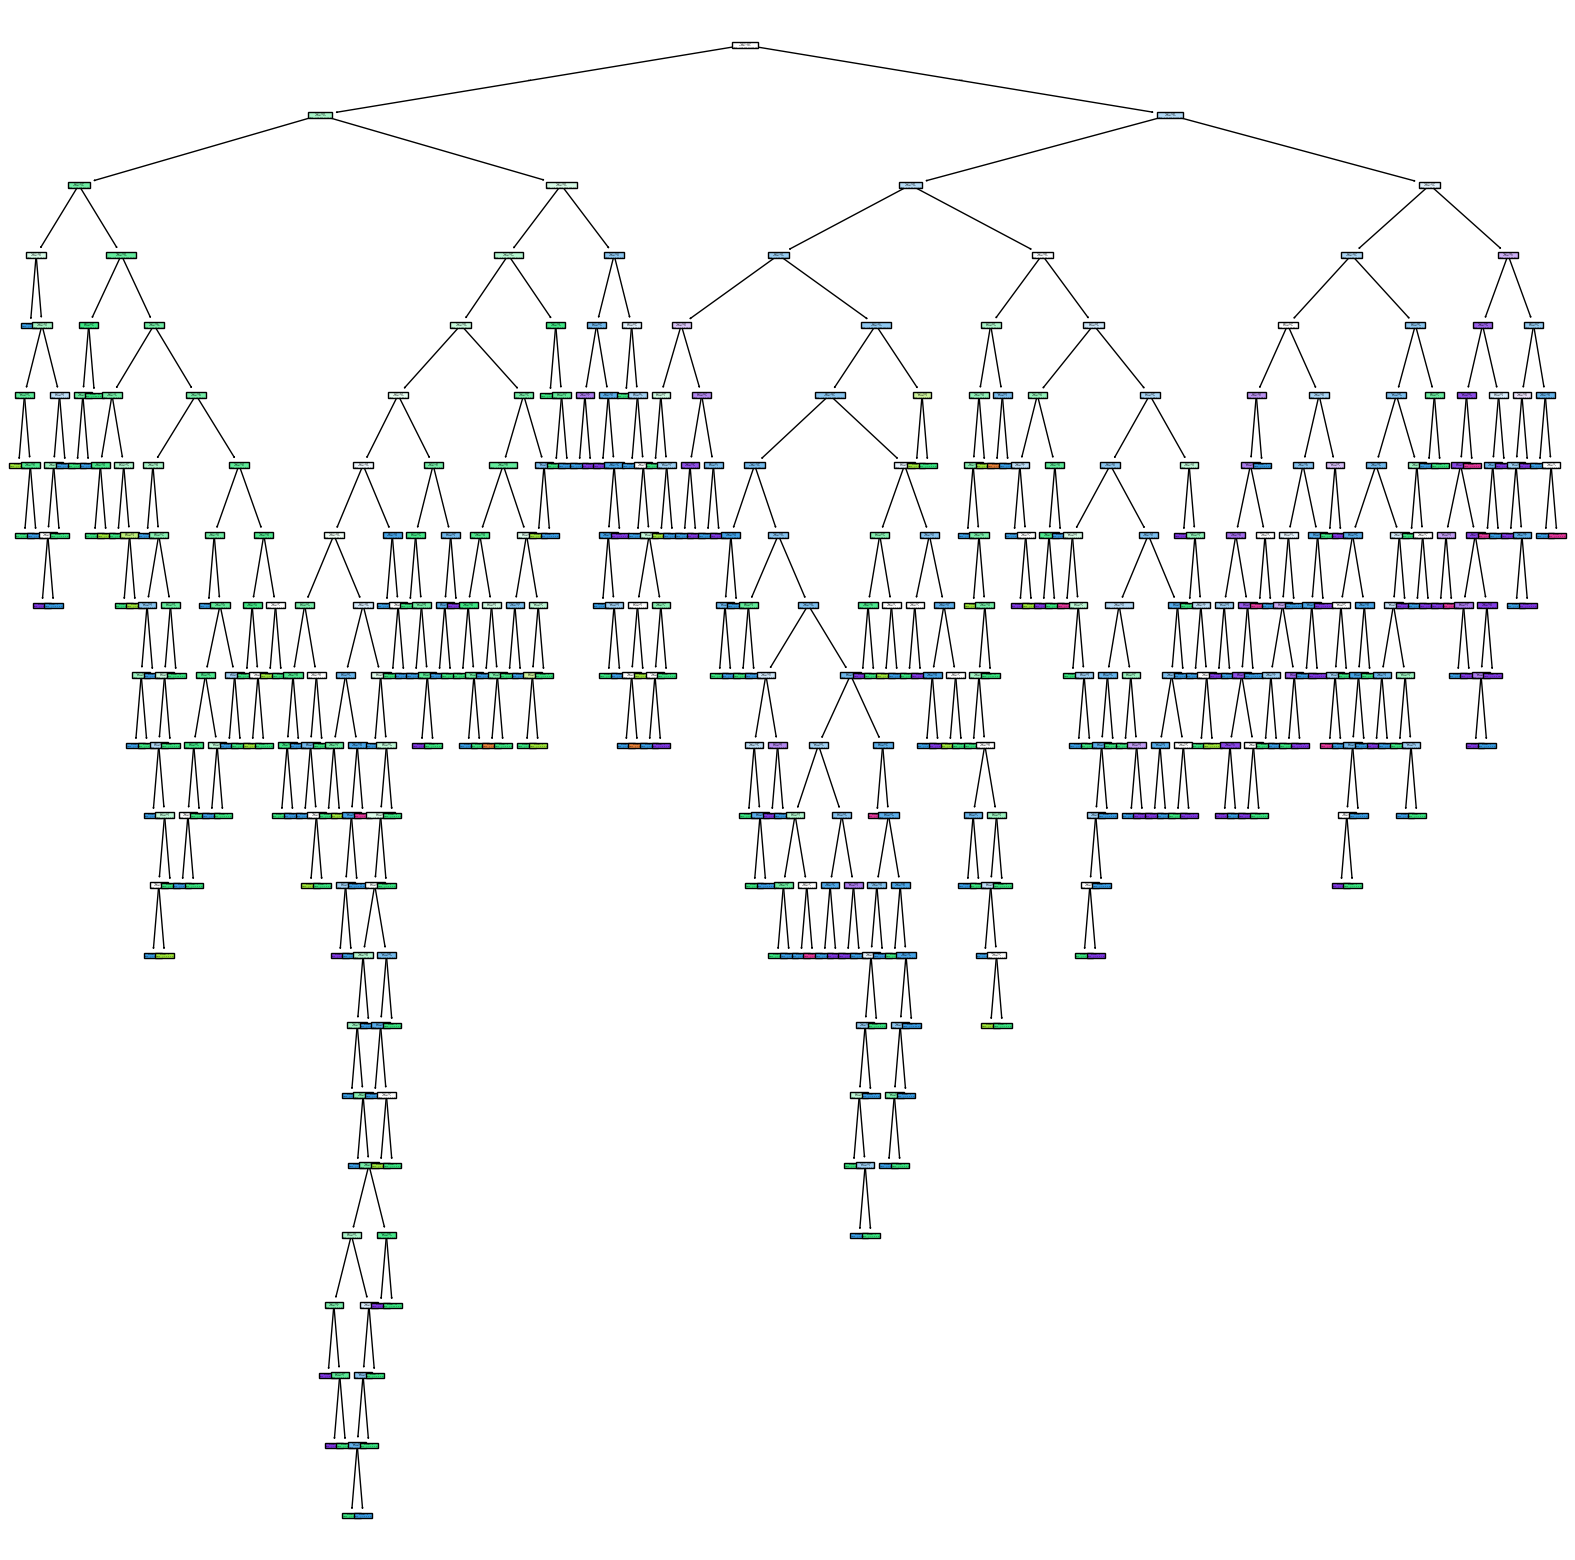

In [19]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled = True)

**Visualizing on Sample Data
Training a small model on 20 rows to visualize the tree structure clearly.**

In [20]:
sampledata = df.head(20)
sampledata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [21]:
x_sample = sampledata.drop(columns = 'quality', axis = 1)
y_sample = sampledata['quality']

In [22]:
samplemodel = DecisionTreeClassifier(random_state=42)
samplemodel.fit(x_sample, y_sample)

DecisionTreeClassifier(random_state=42)

[Text(0.4444444444444444, 0.875, 'x[1] <= 0.41\ngini = 0.475\nsamples = 20\nvalue = [1, 14, 2, 3]'),
 Text(0.2222222222222222, 0.625, 'x[6] <= 81.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 25.0\ngini = 0.304\nsamples = 17\nvalue = [1, 14, 0, 2]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.7777777777777778, 0.375, 'x[10] <= 9.05\ngini = 0.124\nsamples = 15\nvalue = [1, 14, 0, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0]')]

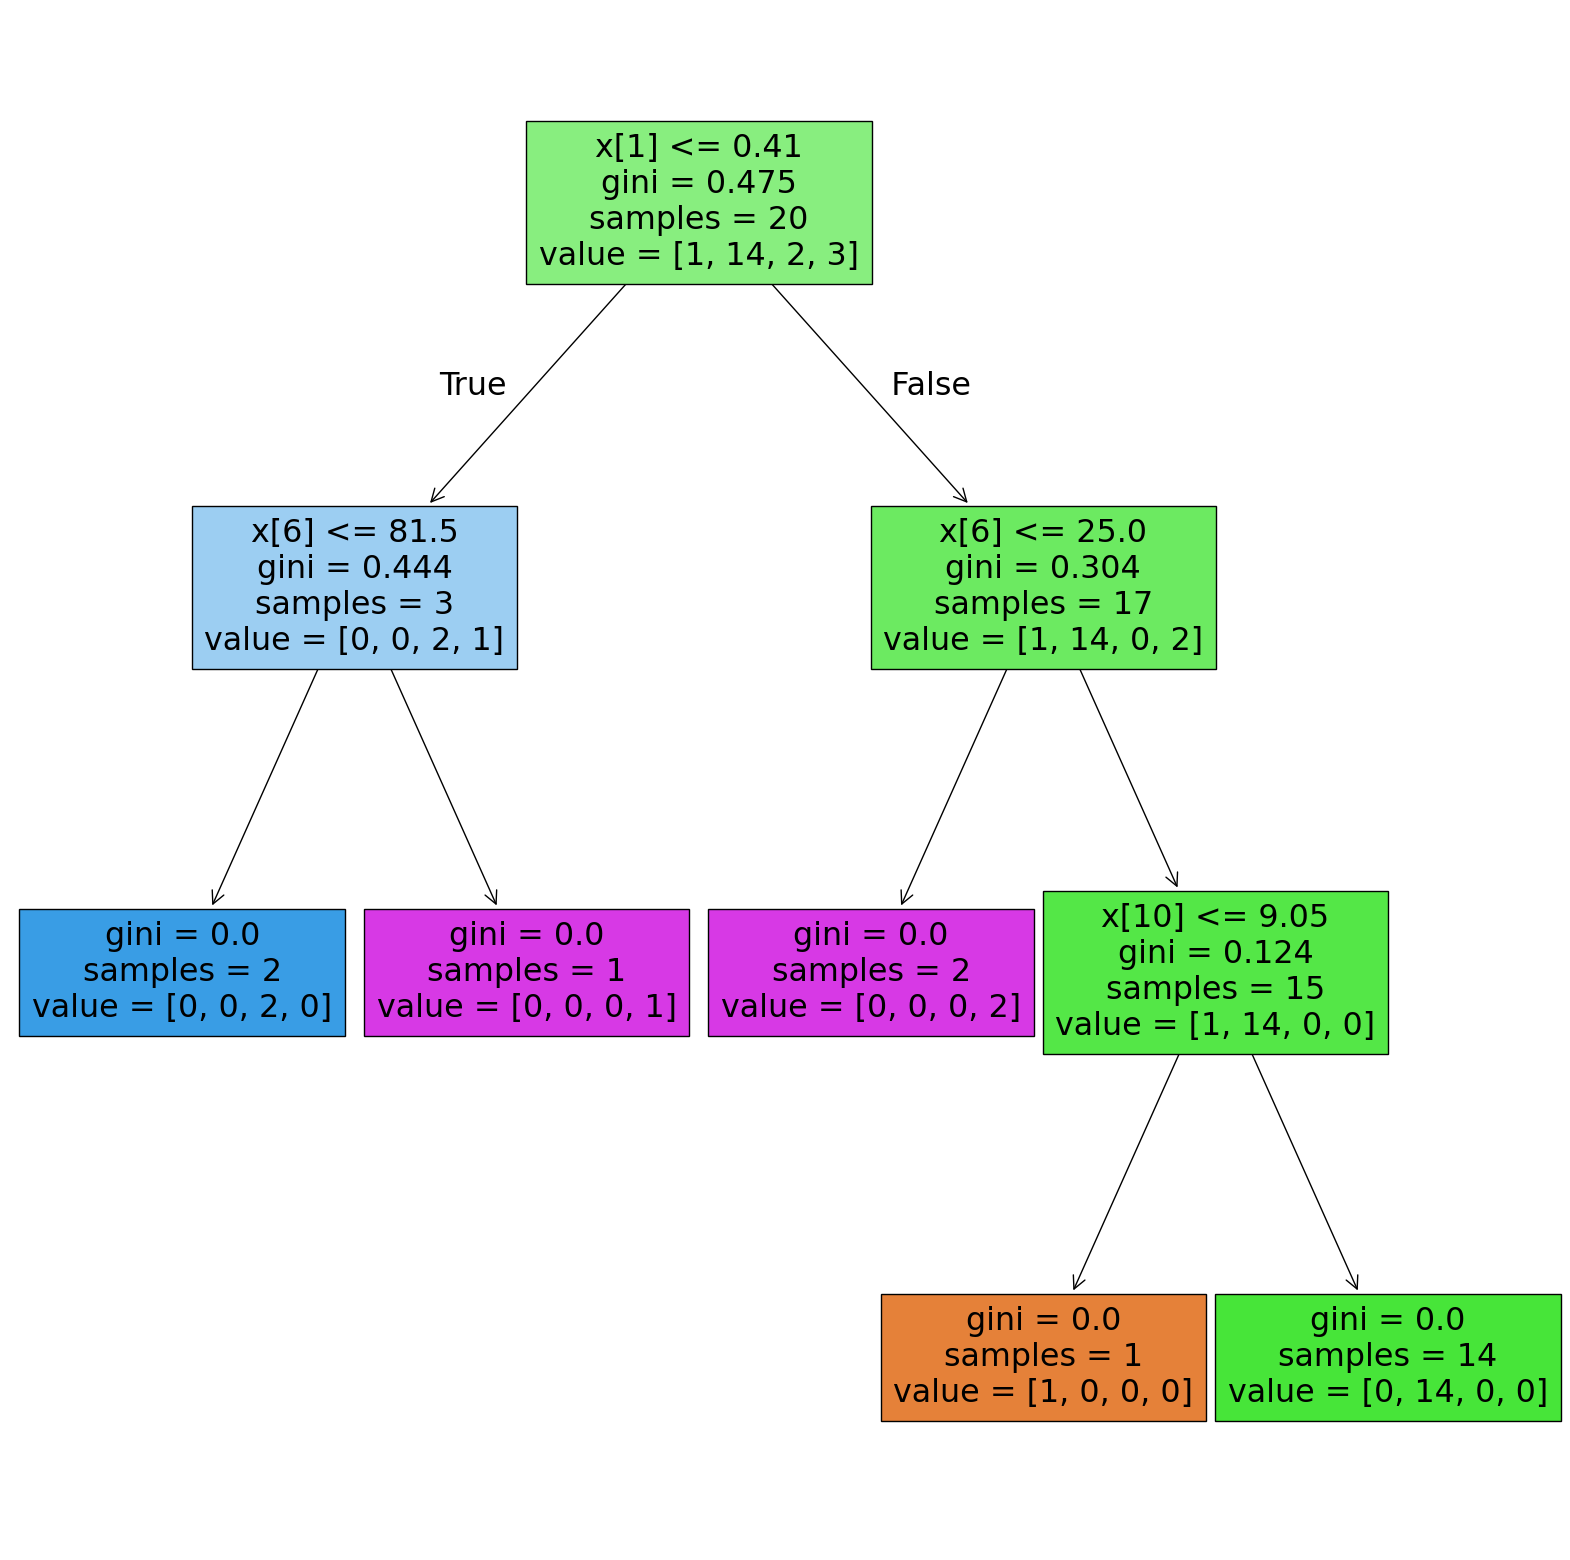

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(samplemodel, filled = True)

**Evaluation
Checking Accuracy and Confusion Matrix.**

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6846153846153846
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.25      0.25         8
           5       0.73      0.74      0.73       108
           6       0.68      0.73      0.71       109
           7       0.64      0.52      0.57        31
           8       0.00      0.00      0.00         3

    accuracy                           0.68       260
   macro avg       0.38      0.37      0.38       260
weighted avg       0.67      0.68      0.68       260



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


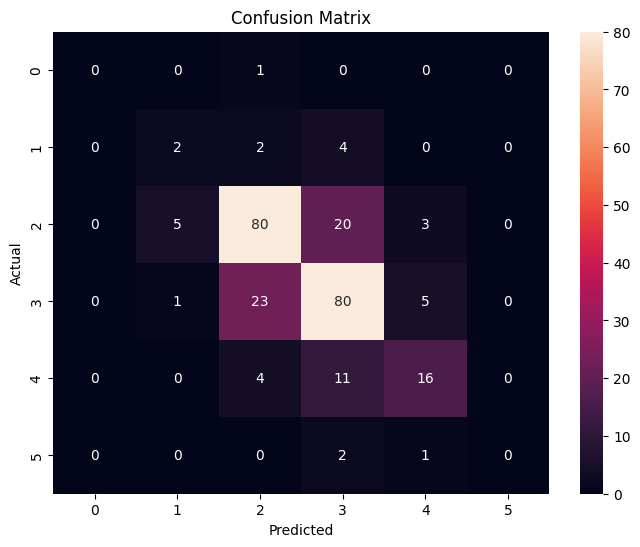

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 6. Model 2: Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Checking Score
rf.score(x_test, y_test)

0.6846153846153846

In [28]:
# Visualizing Estimators
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[5 5 5 5 4 6 6 6 6 6 5 4 6 6 6 6 6 5 6 6 5 5 6 5 5 5 6 5 5 6 5 6 5 6 6 7 5
 5 5 7 5 5 5 6 6 6 6 5 6 5 7 6 5 6 5 5 5 6 5 5 6 5 5 5 5 6 5 6 7 6 6 5 6 5
 6 6 6 5 5 6 6 5 5 6 7 5 5 5 6 5 6 6 6 6 6 7 6 5 5 5 6 5 7 6 6 5 6 5 5 6 7
 6 6 5 6 5 5 6 5 6 5 6 5 5 6 6 6 6 5 6 5 6 7 6 6 6 5 6 6 6 5 5 6 5 5 5 6 5
 6 6 5 5 6 6 5 6 6 5 6 5 5 7 6 5 7 7 6 7 6 5 6 6 6 7 5 7 5 5 5 6 6 6 6 5 6
 6 5 6 5 6 6 6 5 5 6 6 5 5 5 5 5 7 6 6 6 6 5 5 6 5 6 6 5 6 6 6 5 5 5 6 7 6
 5 6 6 7 5 5 7 5 5 5 5 6 6 6 7 6 6 5 5 6 5 5 5 6 6 6 6 6 5 5 6 5 6 6 5 5 5
 6]


In [29]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

[Text(0.5701921548191068, 0.9772727272727273, 'x[9] <= 0.685\ngini = 0.634\nsamples = 662\nvalue = [1, 37, 460, 406, 124, 9]'),
 Text(0.2611446262012436, 0.9318181818181818, 'x[7] <= 0.996\ngini = 0.58\nsamples = 481\nvalue = [1.0, 35.0, 408.0, 258.0, 45.0, 3.0]'),
 Text(0.41566839051017523, 0.9545454545454546, 'True  '),
 Text(0.07447710570944036, 0.8863636363636364, 'x[1] <= 0.37\ngini = 0.624\nsamples = 131\nvalue = [0.0, 6.0, 68.0, 96.0, 24.0, 2.0]'),
 Text(0.02035048049745619, 0.8409090909090909, 'x[3] <= 2.15\ngini = 0.497\nsamples = 27\nvalue = [0, 0, 2, 26, 9, 2]'),
 Text(0.01582815149802148, 0.7954545454545454, 'x[6] <= 7.5\ngini = 0.618\nsamples = 17\nvalue = [0, 0, 2, 13, 9, 2]'),
 Text(0.011305822498586773, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 3, 0]'),
 Text(0.02035048049745619, 0.75, 'x[9] <= 0.545\ngini = 0.597\nsamples = 16\nvalue = [0.0, 0.0, 2.0, 13.0, 6.0, 2.0]'),
 Text(0.009044657998869417, 0.7045454545454546, 'x[4] <= 0.076\ngini = 0.18\nsamples = 7\

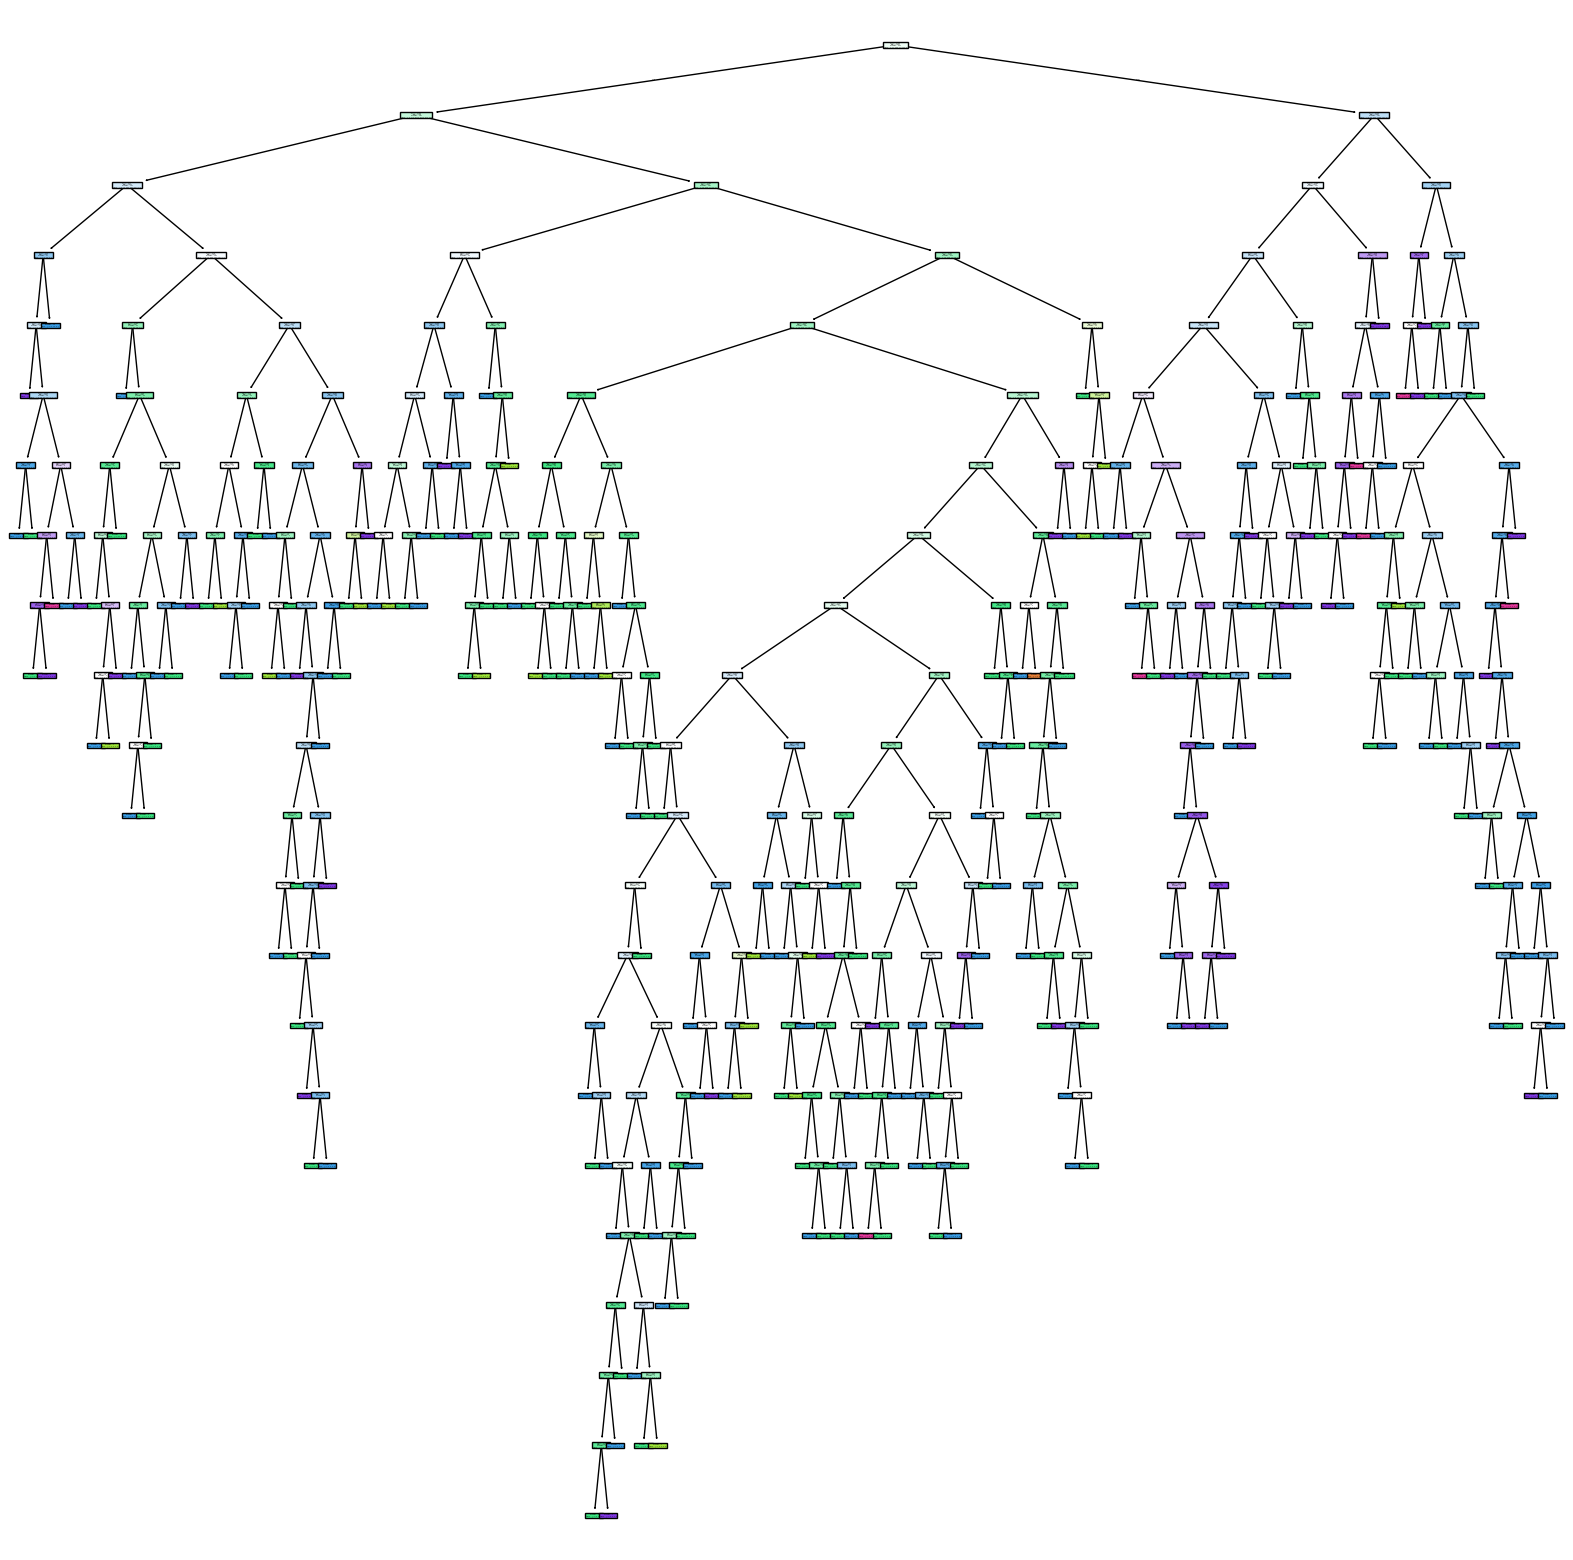

In [30]:
plt.figure(figsize =(20,20))
tree.plot_tree(rf.estimators_[0],filled = True)

# 7. Hyperparameter Tuning (GridSearchCV)

In [31]:
grid_param = {
    'n_estimators' : [50,100,150,200],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_leaf':  range(1, 11)
}

In [32]:
from sklearn.model_selection import GridSearchCV

grid_serach_rf = GridSearchCV(param_grid = grid_param, cv = 10, n_jobs = 6, verbose = 1, estimator = rf)
grid_serach_rf.fit(x_train, y_train)

Fitting 10 folds for each of 1680 candidates, totalling 16800 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': range(1, 11),
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [33]:
#  Best Parameters
grid_serach_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'n_estimators': 100}

#8. Final Model
Training the optimized Random Forest model.

In [36]:
rf_new = RandomForestClassifier(n_estimators = 100, criterion ='entropy',max_depth = 15 ,min_samples_leaf = 2)
rf_new.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)

In [37]:
rf_new.score(x_test, y_test)

0.676923076923077